In [1]:
import os, sys, argparse
from upsetplot import from_memberships
from upsetplot import plot
%matplotlib inline 
from matplotlib import pyplot
import matplotlib.patches as mpatches
import numpy as np

def parse_maf(fp):
    ''' Return a dictionary with vars[patient][variant_set]'''
    caller_vars = {}

    fh = open(fp, 'r')
    for line in fh:
        temp = line.strip().split('\t')
        if line[0] == '#' or temp[0] == 'Hugo_Symbol':
            continue
        ID = temp[16] + '_' + temp[17] # 'tumor'_'normal'
        if ID not in caller_vars:
            caller_vars[ID] = set()
        chrom =temp[4]
        s_pos = temp[5]
        e_pos = temp[6]
        ref = temp[11]
        tum_allele_1 = temp[12]
        tum_allele_2 = temp[13]
        gene = temp[47]
        impact = temp[93]
        var = (chrom, s_pos, e_pos, ref, tum_allele_1, tum_allele_2, gene, impact)
        caller_vars[ID].add(var)

    return(caller_vars)
# main
possible_callers = ('muse', 'mutect', 'somaticsniper', 'varscan')
#not all possible cancers, just for testing
possible_cancers = ('ACC', 'BLCA','BRCA','CESC','CHOL','COAD','DLBC','ESCA','GBM','HNSC', 
					'KICH','KIRC','KIRP','LAML','LGG','LIHC','LUAD','LUSC','MESO')
original = os.getcwd()
#print(original)
# saving contents of intersections 
# 1,2,3,4 = muse, mutect, somaticsniper, varscan feed in arguments as such 




In [2]:
def four_set_contents(dat_1, dat_2, dat_3, dat_4, possible_callers):
    data = dict({(possible_callers[0]):[],(possible_callers[1]):[],(possible_callers[2]):[], (possible_callers[3]):[],
                 (possible_callers[0], possible_callers[1], possible_callers[2]):[], 
                 (possible_callers[0], possible_callers[1], possible_callers[3]):[], 
                 (possible_callers[0], possible_callers[2], possible_callers[3]):[],
                 (possible_callers[1], possible_callers[2], possible_callers[3]):[], 
                 (possible_callers[0], possible_callers[1]):[], (possible_callers[0], possible_callers[2]):[],
                 (possible_callers[0], possible_callers[3]):[], (possible_callers[1], possible_callers[2]):[], 
                 (possible_callers[1], possible_callers[3]):[], (possible_callers[2], possible_callers[3]):[], 
                 (possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3]):[]})
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
                
        inter = set_1 & set_2 & set_3 & set_4
        interlist = data[(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])]#.extend(inter)
        interlist.extend(inter)
        interlist = list(dict.fromkeys(interlist))
        data[(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])]= interlist
        
        inter_123 = (set_1 & set_2 & set_3) - inter
        inter123list = data[(possible_callers[0], possible_callers[1], possible_callers[2])]#.extend(inter_123)
        inter123list.extend(inter_123)
        inter123list = list(dict.fromkeys(inter123list))
        data[(possible_callers[0], possible_callers[1], possible_callers[2])]= inter123list 
        
        inter_124 = (set_1 & set_2 & set_4) - inter
        inter124list = data[(possible_callers[0], possible_callers[1], possible_callers[3])]#.extend(inter_124)
        inter124list.extend(inter_124)
        inter124list = list(dict.fromkeys(inter124list))
        data[(possible_callers[0], possible_callers[1], possible_callers[3])]= inter124list
        
        inter_134 = (set_1 & set_3 & set_4) - inter
        inter134list = data[(possible_callers[0], possible_callers[2], possible_callers[3])]#.extend(inter_134)
        inter134list.extend(inter_134)
        inter134list = list(dict.fromkeys(inter134list))
        data[(possible_callers[0], possible_callers[2], possible_callers[3])]= inter134list
        
        inter_234 = (set_2 & set_3 & set_4) - inter
        inter234list = data[(possible_callers[1], possible_callers[2], possible_callers[3])]#.extend(inter_234)
        inter234list.extend(inter_234)
        inter234list = list(dict.fromkeys(inter234list))
        data[(possible_callers[1], possible_callers[2], possible_callers[3])]= inter234list 
        
        
        
        inter_12 = (set_1 & set_2) - inter - inter_123 - inter_124
        inter12list = data[(possible_callers[0], possible_callers[1])]#.extend(inter_12)
        inter12list.extend(inter_12)
        inter12list = list(dict.fromkeys(inter12list))
        data[(possible_callers[0], possible_callers[1])]= inter12list
        
        inter_13 = (set_1 & set_3) - inter - inter_123 - inter_134
        inter13list = data[(possible_callers[0], possible_callers[2])]#.extend(inter_13)
        inter13list.extend(inter_13)
        inter13list = list(dict.fromkeys(inter13list))
        data[(possible_callers[0], possible_callers[2])]= inter13list
        
        inter_14 = (set_1 & set_4) - inter - inter_124 - inter_134
        inter14list = data[(possible_callers[0], possible_callers[3])]#.extend(inter_14)
        inter14list.extend(inter_14)
        inter14list = list(dict.fromkeys(inter14list))
        data[(possible_callers[0], possible_callers[3])]= inter14list
        
        inter_23 = (set_2 & set_3) - inter - inter_123 - inter_234
        inter23list = data[(possible_callers[1], possible_callers[2])]#.extend(inter_23)
        inter23list.extend(inter_23)
        inter23list = list(dict.fromkeys(inter23list))
        data[(possible_callers[1], possible_callers[2])]= inter23list
        
        inter_24 = (set_2 & set_4) - inter - inter_124 - inter_234
        inter24list = data[(possible_callers[1], possible_callers[3])]#.extend(inter_24)
        inter24list.extend(inter_24)
        inter24list = list(dict.fromkeys(inter24list))
        data[(possible_callers[1], possible_callers[3])]= inter24list
        
        inter_34 = (set_3 & set_4) - inter - inter_234 - inter_134
        inter34list = data[(possible_callers[2], possible_callers[3])]#.extend(inter_34)
        inter34list.extend(inter_34)
        inter34list = list(dict.fromkeys(inter34list))
        data[(possible_callers[2], possible_callers[3])]=inter34list
        
        
        diff_1 = (set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1list = data[(possible_callers[0])]#.extend(diff_1)
        diff1list.extend(diff_1)
        diff1list = list(dict.fromkeys(diff1list))
        data[(possible_callers[0])]= diff1list
        
        diff_2 = (set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2list = data[(possible_callers[1])]#.extend(diff_1)
        diff2list.extend(diff_2)
        diff2list = list(dict.fromkeys(diff2list))
        data[(possible_callers[1])]= diff2list
        
        diff_3 = (set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3list = data[(possible_callers[2])]#.extend(diff_3)
        diff3list.extend(diff_3)
        diff3list = list(dict.fromkeys(diff3list))
        data[(possible_callers[2])]= diff3list 
        
        diff_4 = (set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4list = data[(possible_callers[3])]#.extend(diff_4)
        diff4list.extend(diff_4)
        diff4list = list(dict.fromkeys(diff4list))
        data[(possible_callers[3])]= diff4list
    
    return data

In [3]:
keys = ((possible_callers[0]),(possible_callers[1]),(possible_callers[2]), (possible_callers[3]),
                 (possible_callers[0], possible_callers[1]), (possible_callers[0], possible_callers[2]),
                 (possible_callers[0], possible_callers[3]), (possible_callers[1], possible_callers[2]), 
                 (possible_callers[1], possible_callers[3]), (possible_callers[2], possible_callers[3]), 
                 (possible_callers[0], possible_callers[1], possible_callers[2]), 
                 (possible_callers[0], possible_callers[1], possible_callers[3]), 
                 (possible_callers[0], possible_callers[2], possible_callers[3]),
                 (possible_callers[1], possible_callers[2], possible_callers[3]), 
                 (possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3]))
def how_many_high(cancer, all_variants, possible_callers, content):
    highcount = []
    for key in keys:
        count = 0
        for c in content[key]:
            if c[7] == 'HIGH':
                count += 1
        highcount.append(count)
            
    return highcount

def how_many_moderate(cancer, all_variants, possible_callers, content):
    moderatecount = []
    for key in keys:
        count = 0
        for c in content[key]:
            if c[7] == 'MODERATE':
                count += 1
        moderatecount.append(count)
            
    return moderatecount

def how_many_low(cancer, all_variants, possible_callers, content):
    lowcount = []
    for key in keys:
        count = 0
        for c in content[key]:
            if c[7] == 'LOW':
                count += 1
        lowcount.append(count)
            
    return lowcount

def how_many_modifier(cancer, all_variants, possible_callers, content):
    modifiercount = []
    for key in keys:
        count = 0
        for c in content[key]:
            if c[7] == 'MODIFIER':
                count += 1
        modifiercount.append(count)
            
    return modifiercount
#print(how_many_high('ACC'))

In [4]:
def two_set(dat_1, dat_2):
    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys()))
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        inter = len(set_1 & set_2)
        diff_1 = len(set_1 - set_2)
        diff_2 = len(set_2 - set_1)

        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
    
    dat.extend([inter_all, diff_1_all, diff_2_all])
    return dat


In [5]:
def three_set(dat_1, dat_2, dat_3):

    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    inter_12_all = 0
    inter_13_all = 0
    inter_23_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys()))
    
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        inter = len(set_1 & set_2 & set_3)
        inter_12 = len(set_1 & set_2) - inter
        inter_13 = len(set_1 & set_3) - inter
        inter_23 = len(set_2 & set_3) - inter
        diff_1 = len(set_1) - inter - inter_13 - inter_12
        diff_2 = len(set_2) - inter - inter_12 - inter_23
        diff_3 = len(set_3) - inter - inter_13 - inter_23
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_23_all = inter_23_all + inter_23

    dat.extend([inter_all, diff_1_all, diff_2_all, diff_3_all, inter_12_all, inter_13_all, inter_23_all])
    return dat


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0
  'left=%s, right=%s') % (left, right))
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

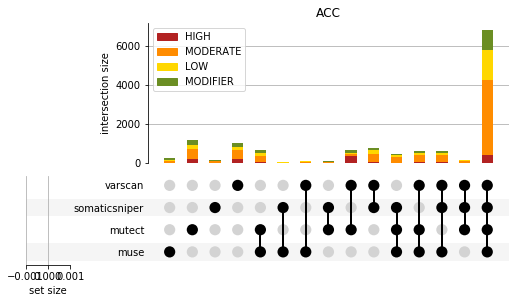

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

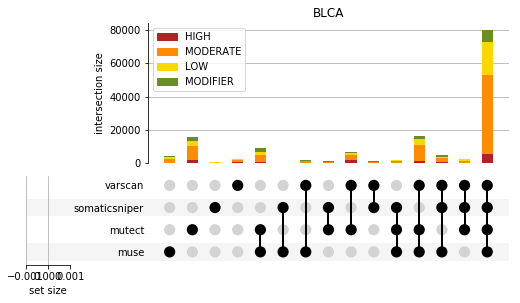

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

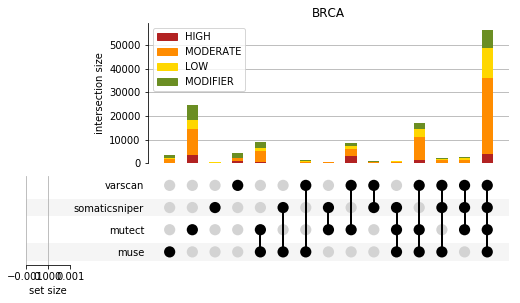

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

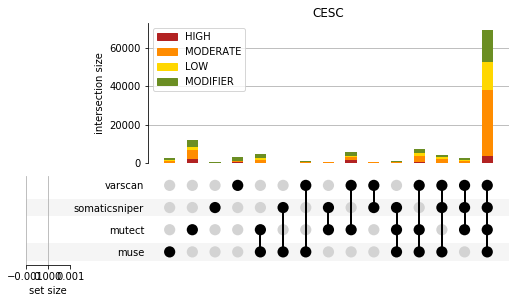

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

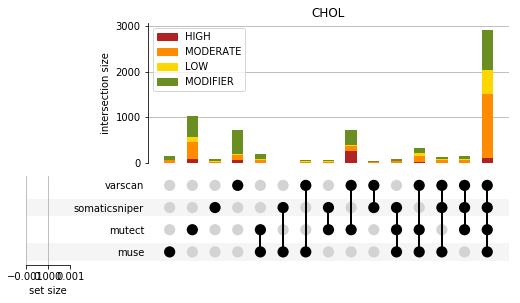

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

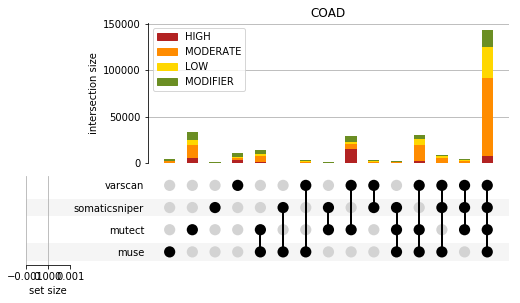

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

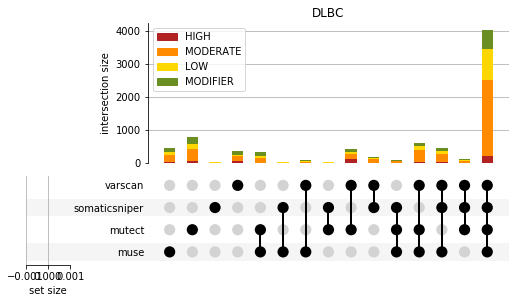

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

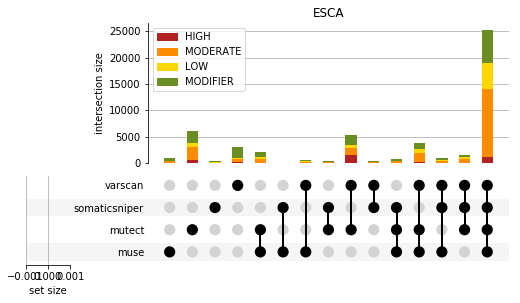

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

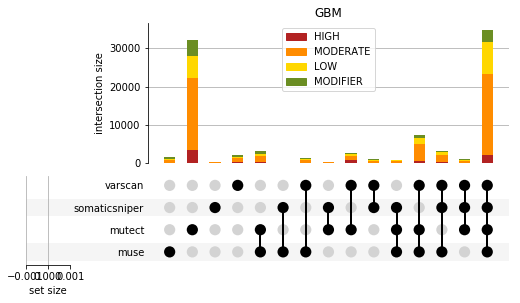

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

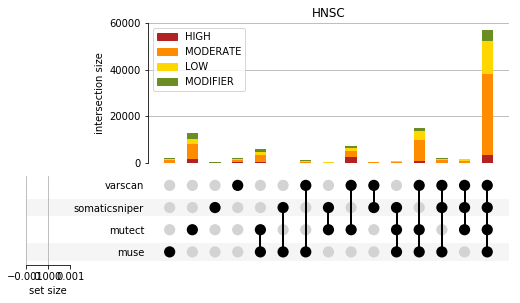

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

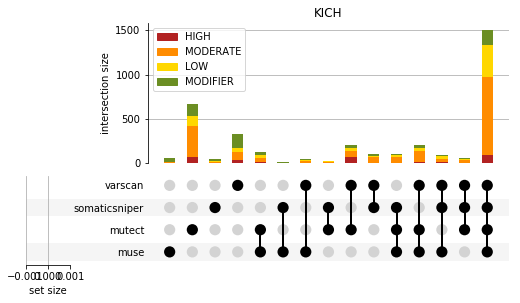

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

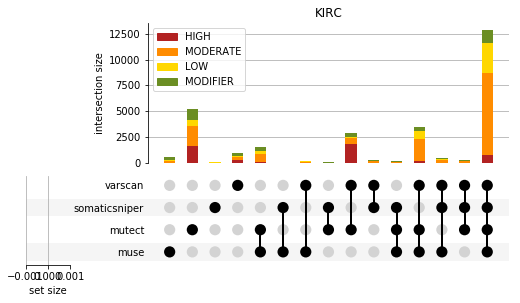

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

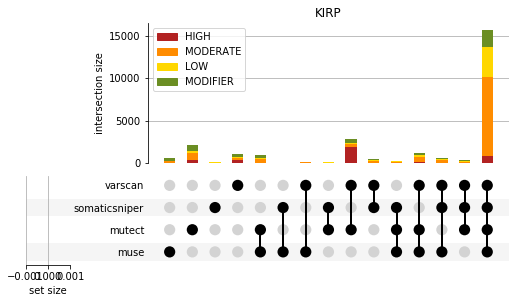

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

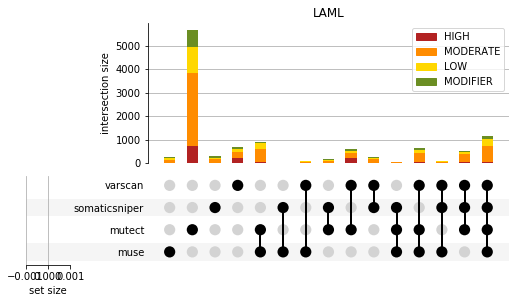

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

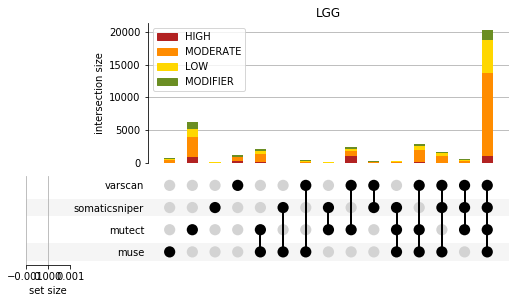

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

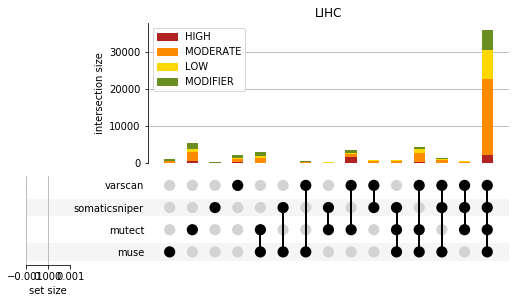

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

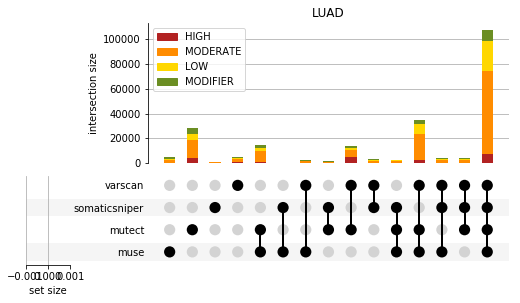

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

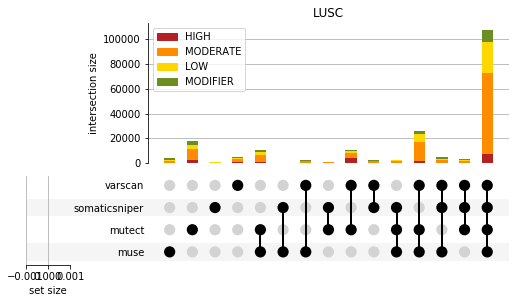

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

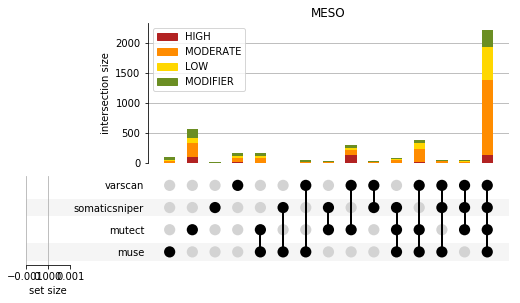

In [6]:
os.chdir(original)
# functions 48, 94

def four_set(dat_1, dat_2, dat_3, dat_4):
    dat = []
    inter_all = 0
    
    interall = []
    
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    diff_4_all = 0
    
    diff1all = []
    diff2all = []
    diff3all = []
    diff4all = []
    
    inter_12_all = 0
    inter_13_all = 0
    inter_14_all = 0
    inter_23_all = 0
    inter_24_all = 0
    inter_34_all = 0
    
    inter12all = []
    inter13all = []
    inter14all = []
    inter23all = []
    inter24all = []
    inter34all = []
    
    inter_123_all = 0
    inter_124_all = 0
    inter_134_all = 0
    inter_234_all = 0    
    
    inter123all = []
    inter124all = []
    inter134all = []
    inter234all = []
    
    set1_total = 0
    set2_total = 0
    set3_total = 0
    set4_total = 0
    
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    total = 0
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
        
        set1_total = set1_total + len(set_1)
        set2_total = set2_total + len(set_2)
        set3_total = set3_total + len(set_3)
        set4_total = set4_total + len(set_4)
        
        
        inter = len(set_1 & set_2 & set_3 & set_4)
        interall.append(inter)
        inter_123 = len(set_1 & set_2 & set_3) - inter
        inter123all.append(inter_123)
        inter_124 = len(set_1 & set_2 & set_4) - inter
        inter124all.append(inter_124)
        inter_134 = len(set_1 & set_3 & set_4) - inter
        inter134all.append(inter_134)
        inter_234 = len(set_2 & set_3 & set_4) - inter
        inter234all.append(inter_234)
        
        
        inter_12 = len(set_1 & set_2) - inter - inter_123 - inter_124
        inter12all.append(inter_12)
        inter_13 = len(set_1 & set_3) - inter - inter_123 - inter_134
        inter13all.append(inter_13)
        inter_14 = len(set_1 & set_4) - inter - inter_124 - inter_134
        inter14all.append(inter_14)
        inter_23 = len(set_2 & set_3) - inter - inter_123 - inter_234
        inter23all.append(inter_23)
        inter_24 = len(set_2 & set_4) - inter - inter_124 - inter_234
        inter24all.append(inter_24)
        inter_34 = len(set_3 & set_4) - inter - inter_234 - inter_134
        inter34all.append(inter_34)
        
        diff_1 = len(set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1all.append(diff_1)
        diff_2 = len(set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2all.append(diff_2)
        diff_3 = len(set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3all.append(diff_3)
        diff_4 = len(set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4all.append(diff_4)
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        diff_4_all = diff_4_all + diff_4
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_14_all = inter_14_all + inter_14
        inter_23_all = inter_23_all + inter_23
        inter_24_all = inter_24_all + inter_24
        inter_34_all = inter_34_all + inter_34
        inter_123_all = inter_123_all + inter_123
        inter_124_all = inter_124_all + inter_124
        inter_134_all = inter_134_all + inter_134
        inter_234_all = inter_234_all + inter_234
        total = total + len(set_1 & set_2)
        """
    print("number of patients:", len(patients))
    print("all:", np.mean(interall), np.var(interall))
    print("mutect:", np.mean(diff1all), np.var(diff1all))
    print("muse:", np.mean(diff2all), np.var(diff2all))
    print("somaticsniper:", np.mean(diff3all), np.var(diff3all))
    print("varscan:", np.mean(diff4all), np.var(diff4all))
    print("mutect+muse:", np.mean(inter12all), np.var(inter12all))
    print("mutect+somaticsniper:", np.mean(inter13all), np.var(inter13all))
    print("mutect+varscan:", np.mean(inter14all), np.var(inter14all))
    print("muse+somaticsniper:", np.mean(inter23all), np.var(inter23all))
    print("muse+varscan:", np.mean(inter24all), np.var(inter24all))
    print("somaticsniper+varscan:", np.mean(inter34all), np.var(inter34all))
    print("mutect+muse+somaticsniper:", np.mean(inter123all), np.var(inter123all))
    print("mutect+muse+varscan:", np.mean(inter124all), np.var(inter124all))
    print("mutect+somaticsniper+varscan:", np.mean(inter134all), np.var(inter134all))
    print("muse+somaticsniper+varscan:", np.mean(inter234all), np.var(inter234all))
    print(interall)
    """
    dat.extend([diff_1_all, diff_2_all, diff_3_all, diff_4_all, inter_12_all, inter_13_all, inter_14_all, 
               inter_23_all, inter_24_all, inter_34_all, inter_123_all, inter_124_all, inter_134_all, inter_234_all,
               inter_all])    
    return dat

test = os.getcwd()
#print(test)

for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
    # four way intersection    
    #dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        #all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    
    contents = four_set_contents(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                             all_variants[possible_callers[2]], all_variants[possible_callers[3]], possible_callers)
    
    hmhi = np.array(how_many_high(cancer, all_variants, possible_callers, contents))
    hmmr = np.array(how_many_moderate(cancer, all_variants, possible_callers, contents))
    hmlo = np.array(how_many_low(cancer, all_variants, possible_callers, contents))
    hmmf = np.array(how_many_modifier(cancer, all_variants, possible_callers, contents))
    
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=np.zeros(15))
    
    pyplot.figure()
    
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    
    ax['intersections'].bar(np.arange(0,15), hmhi, width=0.5, zorder=3, color = 'firebrick')
    
    ax['intersections'].bar(np.arange(0,15), hmmr, width=0.5, bottom = hmhi, zorder=3, color = 'darkorange')
    
    ax['intersections'].bar(np.arange(0,15), hmlo, width = 0.5, bottom=hmhi+hmmr, zorder=3, color = 'gold')
    
    ax['intersections'].bar(np.arange(0,15), hmmf, width = 0.5, bottom=hmhi+hmmr+hmlo, zorder=3, color = 'olivedrab')
    
    pyplot.title(cancer)
    pyplot.legend()
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    
    hi_patch = mpatches.Patch(color='firebrick', label='HIGH')
    mr_patch = mpatches.Patch(color='darkorange', label='MODERATE')
    lo_patch = mpatches.Patch(color='gold', label='LOW')
    mf_patch = mpatches.Patch(color='olivedrab', label='MODIFIER')
    pyplot.legend(handles=[hi_patch, mr_patch, lo_patch, mf_patch])
    
    filename = ("%s.pdf"% cancer)
    pyplot.savefig(filename)
    pyplot.show()
    
    
    
    


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0
  'left=%s, right=%s') % (left, right))
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

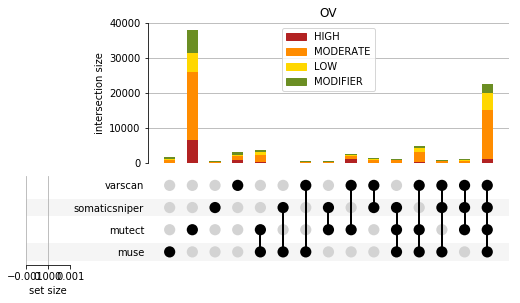

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

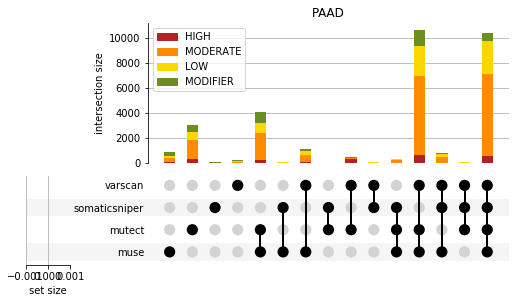

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

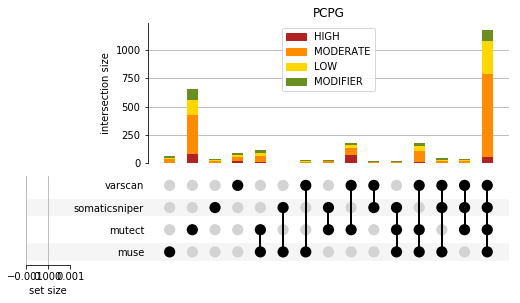

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

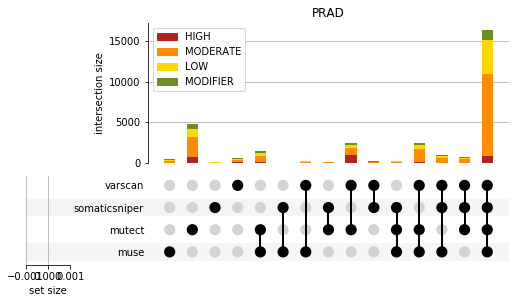

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

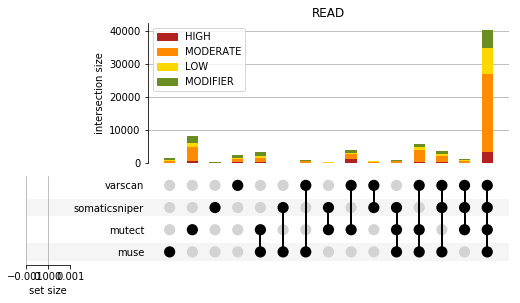

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

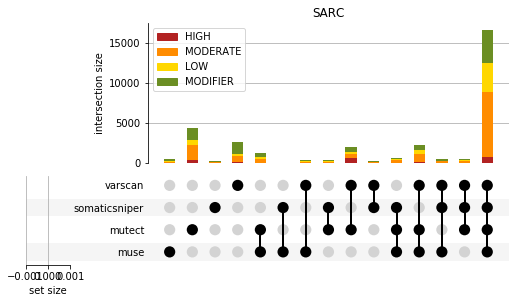

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

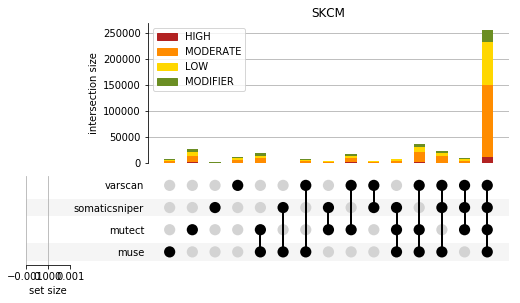

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

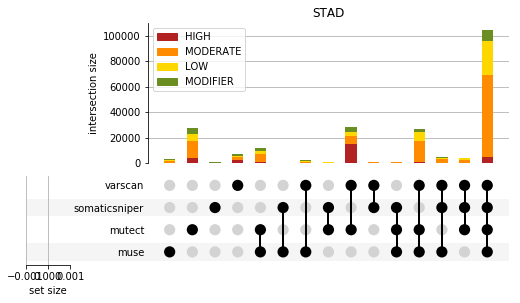

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

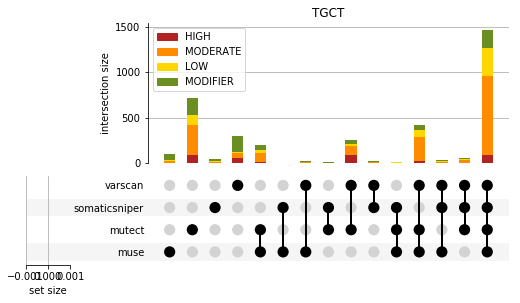

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

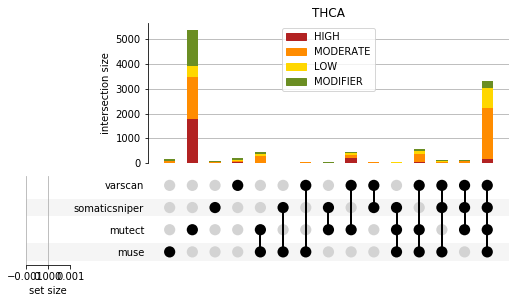

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

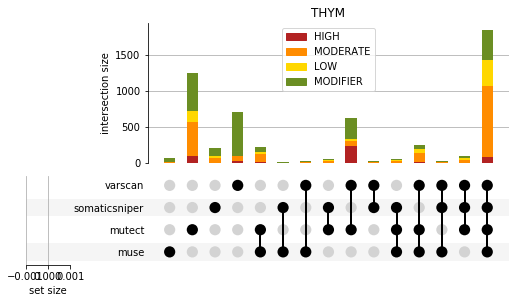

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

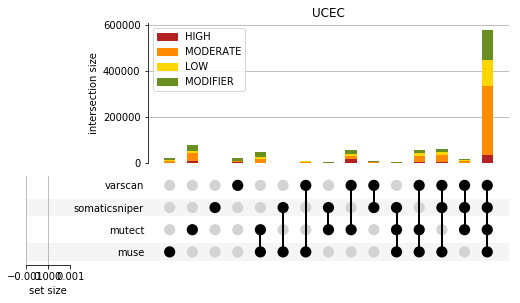

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

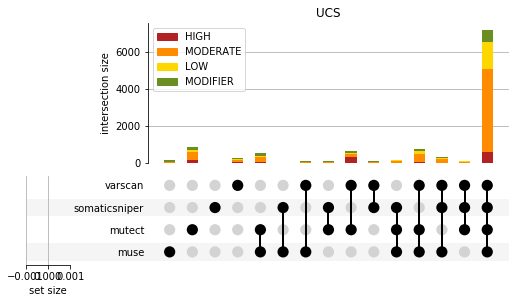

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

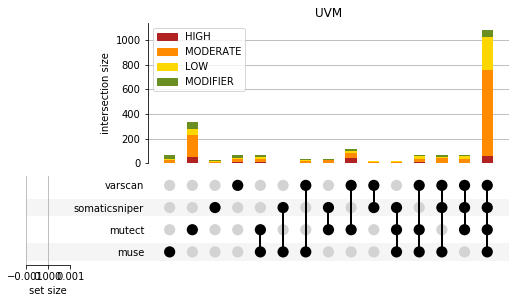

In [7]:
## os.chdir(original)
possible_cancers = ('OV','PAAD','PCPG','PRAD','READ','SARC','SKCM','STAD','TGCT','THCA','THYM','UCEC','UCS','UVM')
for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
   # four way intersection    
    #dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        #all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    
    contents = four_set_contents(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                             all_variants[possible_callers[2]], all_variants[possible_callers[3]], possible_callers)
    
    hmhi = np.array(how_many_high(cancer, all_variants, possible_callers, contents))
    hmmr = np.array(how_many_moderate(cancer, all_variants, possible_callers, contents))
    hmlo = np.array(how_many_low(cancer, all_variants, possible_callers, contents))
    hmmf = np.array(how_many_modifier(cancer, all_variants, possible_callers, contents))
    
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=np.zeros(15))
    
    pyplot.figure()
    
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    
    ax['intersections'].bar(np.arange(0,15), hmhi, width=0.5, zorder=3, color = 'firebrick')
    
    ax['intersections'].bar(np.arange(0,15), hmmr, width=0.5, bottom = hmhi, zorder=3, color = 'darkorange')
    
    ax['intersections'].bar(np.arange(0,15), hmlo, width = 0.5, bottom=hmhi+hmmr, zorder=3, color = 'gold')
    
    ax['intersections'].bar(np.arange(0,15), hmmf, width = 0.5, bottom=hmhi+hmmr+hmlo, zorder=3, color = 'olivedrab')
    
    pyplot.title(cancer)
    pyplot.legend()
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    
    hi_patch = mpatches.Patch(color='firebrick', label='HIGH')
    mr_patch = mpatches.Patch(color='darkorange', label='MODERATE')
    lo_patch = mpatches.Patch(color='gold', label='LOW')
    mf_patch = mpatches.Patch(color='olivedrab', label='MODIFIER')
    pyplot.legend(handles=[hi_patch, mr_patch, lo_patch, mf_patch])
    
    filename = ("%s.pdf"% cancer)
    pyplot.savefig(filename)
    pyplot.show()
    
    

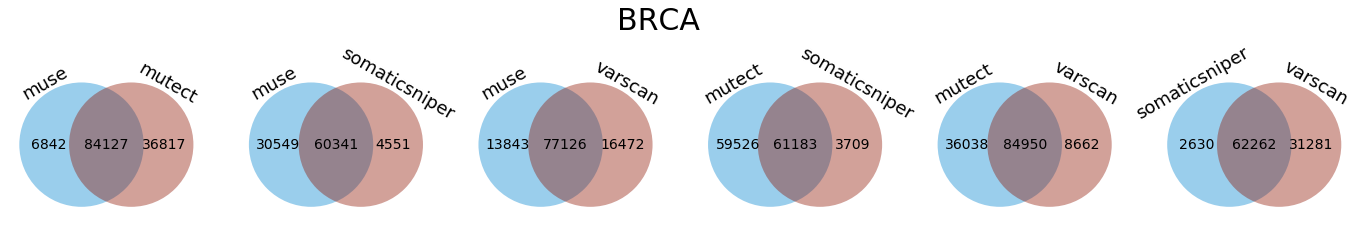

<Figure size 432x288 with 0 Axes>

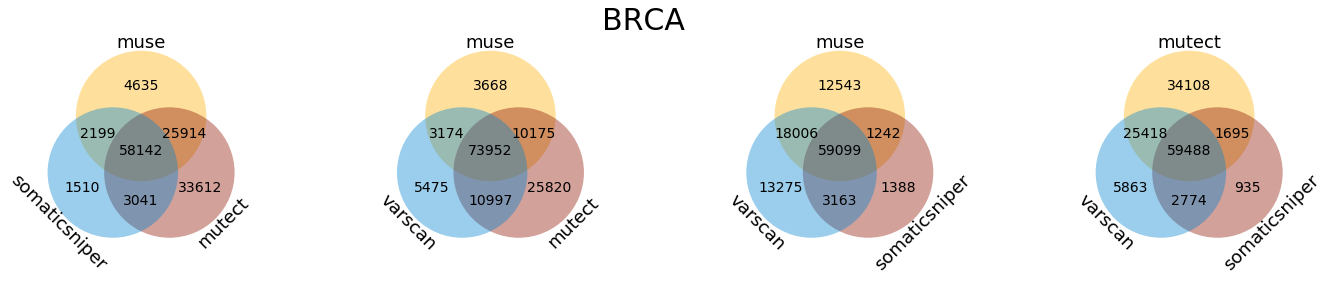

number of patients: 975
all: 58.550769230769234 31956.50793530572
mutect: 3.562051282051282 101.8482009204471
muse: 25.68 3482.2565743589744
somaticsniper: 0.7671794871794871 1.4832305062458908
varscan: 4.821538461538461 153.6317412228797
mutect+muse: 9.302564102564103 940.6089677843524
mutect+somaticsniper: 0.19179487179487179 0.33962498356344517
mutect+varscan: 1.1917948717948719 73.42680447074294
muse+somaticsniper: 0.6564102564102564 1.948612754766601
muse+varscan: 8.793846153846154 635.2795518737673
somaticsniper+varscan: 0.7815384615384615 3.4794540433925047
mutect+muse+somaticsniper: 1.082051282051282 6.143011176857332
mutect+muse+varscan: 17.275897435897434 8452.622342143326
mutect+somaticsniper+varscan: 2.0635897435897435 141.93236660092043
muse+somaticsniper+varscan: 2.4625641025641025 42.5768036817883
[172, 32, 29, 47, 109, 21, 31, 26, 27, 17, 65, 13, 29, 44, 97, 18, 50, 109, 20, 19, 41, 48, 34, 51, 21, 8, 73, 18, 17, 22, 46, 20, 12, 2, 43, 39, 16, 22, 25, 37, 21, 13, 6, 42,

<Figure size 432x288 with 0 Axes>

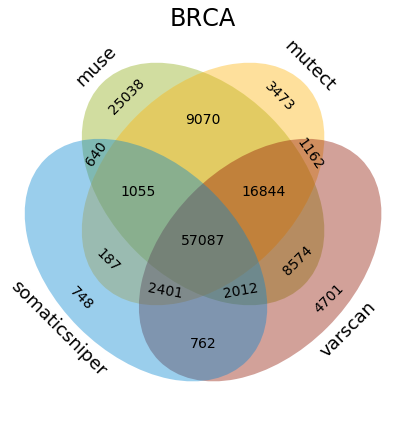

In [9]:
import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4

# BRCA Venn diagrams
os.chdir(original)
os.chdir('BRCA')
mafs = os.listdir()

maf_fps = {}
for caller in possible_callers:
    for maf in mafs:
        if caller in maf: # str in the filepath
            maf_fps[caller] = maf

# parse maf for each caller
all_variants = {}
for caller in maf_fps:
    all_variants[caller] = parse_maf(maf_fps[caller])
        
num_callers = len(possible_callers)
fig, axes = plt.subplots(1, 6, figsize=(24, 4))
#two ways
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        dat = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
        data = []
        data.extend([dat[1], dat[2], dat[0]])
        sets = (possible_callers[i], possible_callers[j])
        subsets = data
        ax = axes[sub]
        venn2(subsets, sets, ax=ax)
        ax.set_title('', fontsize=24)
        sub = sub+1

fig.suptitle('BRCA', fontsize=30)
filename = ("BRCA2venn.pdf")
pyplot.savefig(filename)
plt.show()
plt.clf()

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
# three ways 
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        for k in range(j+1, num_callers):
            dat = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
            data = []
            data.extend([dat[1], dat[2], dat[3], dat[4],dat[5],dat[6],dat[0]])
            sets = (possible_callers[i], possible_callers[j],possible_callers[k])
            subsets = data
            ax = axes[sub]
            venn3(subsets, sets, ax=ax)
            ax.set_title('', fontsize=24)
            sub = sub+1

fig.suptitle('BRCA', fontsize=30)
filename = ("BRCA3venn.pdf")
pyplot.savefig(filename)
plt.show()
plt.clf()
import numpy as np
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

# four way intersection    
dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
print(dat)
data = []
data.extend([dat[1],dat[0],dat[2],dat[3],dat[4],dat[7],dat[8],dat[5],dat[6],dat[9],dat[10],dat[11],dat[13],dat[12],dat[14]])
sets = (possible_callers[0], possible_callers[1],possible_callers[2], possible_callers[3])
subsets = data
ax = axes
venn4(subsets, sets)
plt.title('BRCA', fontsize=24)
filename = ("BRCA4venn.pdf")
pyplot.savefig(filename)
plt.show()
